# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
numCity = 0
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url
# Setup lists to capture data through API calls, which will be added to the dataframe later
city_list = []
geo_lat_list = []
geo_long_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
dates_list = []

#Loop through the cities list and append data to the appropriate lists
print(f"Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        geo_lat_list.append(response["coord"]["lat"])
        geo_long_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        dates_list.append(response["dt"])
        city_list.append(city)
        numCity += 1
        print(f"Processing Record {numCity} | {city}")
    except:
        print(f"City ({city}) not found. Skipping...")
        pass

print("-----------------------------")
print(f"Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 | ahipara
City (meyungs) not found. Skipping...
Processing Record 2 | busselton
Processing Record 3 | hermanus
Processing Record 4 | sao jose da coroa grande
Processing Record 5 | rabo de peixe
Processing Record 6 | saint-francois
Processing Record 7 | cape town
Processing Record 8 | cabedelo
Processing Record 9 | arraial do cabo
Processing Record 10 | olga
Processing Record 11 | tres lagoas
Processing Record 12 | diffa
Processing Record 13 | cabo san lucas
Processing Record 14 | bluff
Processing Record 15 | bethel
Processing Record 16 | alta floresta
Processing Record 17 | clyde river
Processing Record 18 | chuy
Processing Record 19 | wajima
Processing Record 20 | airai
Processing Record 21 | daru
Processing Record 22 | vila velha
Processing Record 23 | bonthe
Processing Record 24 | ossora
Processing Record 25 | avarua
Processing Record 26 | khatanga
Processing Record 27 | hobart
Processing Record 28 | tasiilaq

Processing Record 219 | vaitape
Processing Record 220 | half moon bay
Processing Record 221 | honiara
Processing Record 222 | tavricheskoye
Processing Record 223 | tilichiki
City (kuche) not found. Skipping...
Processing Record 224 | palana
Processing Record 225 | quatre cocos
Processing Record 226 | istmina
Processing Record 227 | pafos
Processing Record 228 | nanortalik
Processing Record 229 | abu kamal
Processing Record 230 | madang
Processing Record 231 | roald
Processing Record 232 | gibara
Processing Record 233 | ilulissat
City (wahran) not found. Skipping...
Processing Record 234 | krasnoselkup
Processing Record 235 | mont-de-marsan
Processing Record 236 | luderitz
Processing Record 237 | edissiya
Processing Record 238 | morro bay
Processing Record 239 | san patricio
Processing Record 240 | adrar
Processing Record 241 | buraydah
Processing Record 242 | clarence town
Processing Record 243 | wairoa
Processing Record 244 | tromso
Processing Record 245 | margate
Processing Record 24

Processing Record 442 | marawi
Processing Record 443 | abalak
Processing Record 444 | port blair
Processing Record 445 | yerbogachen
City (karamea) not found. Skipping...
Processing Record 446 | katangli
Processing Record 447 | salciile
Processing Record 448 | kolondieba
Processing Record 449 | anori
Processing Record 450 | maningrida
Processing Record 451 | hofn
Processing Record 452 | esperance
Processing Record 453 | san luis
Processing Record 454 | ketchikan
Processing Record 455 | samarai
City (sentyabrskiy) not found. Skipping...
Processing Record 456 | methoni
Processing Record 457 | simao
Processing Record 458 | salekhard
Processing Record 459 | teguldet
Processing Record 460 | caibiran
Processing Record 461 | ouro preto do oeste
Processing Record 462 | vardo
Processing Record 463 | yaan
Processing Record 464 | massaguet
Processing Record 465 | pangnirtung
Processing Record 466 | sao francisco do sul
Processing Record 467 | college
Processing Record 468 | angoram
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
temperature_by_city_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : geo_lat_list,
    "Long" : geo_long_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : windspeed_list,
    "Country" : country_list,
    "Date" : dates_list,
})


temperature_by_city_df.to_csv(output_data_file)
temperature_by_city_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ahipara,-35.1667,173.1667,61.66,86,10,10.60,NZ,1619195398
1,busselton,-33.6500,115.3333,61.00,79,49,7.38,AU,1619195329
2,hermanus,-34.4187,19.2345,62.01,78,70,5.73,ZA,1619195306
3,sao jose da coroa grande,-8.8978,-35.1478,83.84,68,20,8.01,BR,1619195968
4,rabo de peixe,37.8000,-25.5833,59.00,72,75,23.02,PT,1619195401


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_over_100_df = temperature_by_city_df.loc[temperature_by_city_df["Humidity"]>100]
humidity_over_100_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

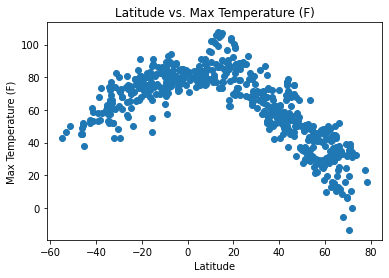

As the Scatter Plot clearly shows, the highest temperatures are closer to the equater.
Temperatures are far lower as we move away from the equater. .


In [20]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Max Temp"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature (F)")
plt.show()

print(f"As the Scatter Plot clearly shows, the highest temperatures are closer to the equater.")
print(f"Temperatures are far lower as we move away from the equater. .")

## Latitude vs. Humidity Plot

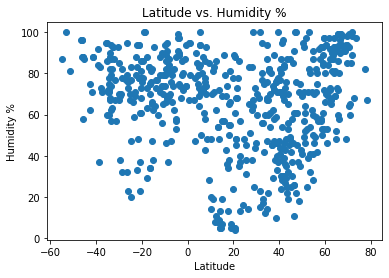

Humidity % tends to be the lowest closer to the equator and the highest away from the equator.
However, there are cities closest to the equator that share similiar humidity levels as cities that are farther from the equator.


In [21]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Humidity"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity %")
plt.show()

print(f"Humidity % tends to be the lowest closer to the equator and the highest away from the equator.")
print(f"However, there are cities closest to the equator that share similiar humidity levels as cities that are farther from the equator.")

## Latitude vs. Cloudiness Plot

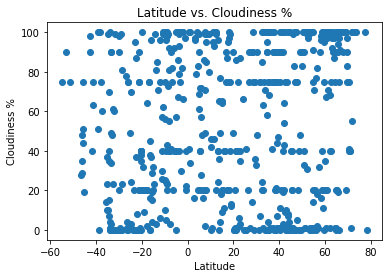

There seems to be no correlation between cloudiness and latitude.


In [22]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Cloudiness"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness %")
plt.show()

print(f"There seems to be no correlation between cloudiness and latitude.")

## Latitude vs. Wind Speed Plot

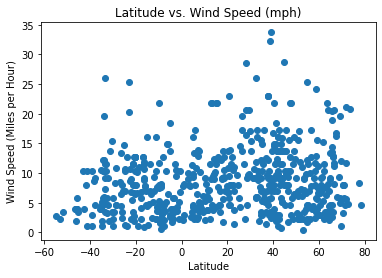

There is less Wind Speed closer to the equator. The highest windspeeds are found from the -25 to -40 range, and from 25 to 45 range.
Windspeed is greatly reduced as we move away from the equator on either direction.


In [24]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Wind Speed"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Miles per Hour)")
plt.title("Latitude vs. Wind Speed (mph)")
plt.show()

print(f"There is less Wind Speed closer to the equator. The highest windspeeds are found from the -25 to -40 range, and from 25 to 45 range.")
print(f"Windspeed is greatly reduced as we move away from the equator on either direction.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression